## Exercise #1: Modeling population growth

In this exercise, we will set up a population growth model in order to practice:
- Creating and working with arrays using `numpy`
- For loops
- Plotting with `matplotlib`

*Optional*:
- Using `scipy` to calculate linear regression

In [22]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt

### 1. Initilize model
Let's start with a simple and fundamental model in population ecology:
dN/dt = (birth rate - death rate) * (# of individuals in population) = r * N

First, we need to establish some variables for our model:

In [23]:
# Number of individuals at time 0
N_t0 = 10
# Growth rate (growth rate = r = birth - death) of population per hour 
growthRate = 0.1
# Number of steps in model (each step equals 1 hour, so number of hours)
modelSteps = 100

We also need a way to store all the data we will be generate in our model runs. We will use the **array** data type within the `numpy` library to do this:

In [24]:
# Create an empty array to store population size (all initialized to 0)
N = np.zeros(modelSteps)
print(N)

# Set number of individuals at time 0
N[0] = N_t0
print(N)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0]


### 2. Build/run model

Now we're ready to construct our model! Remember that we are modelling growth rate using the function: 

$dN/dt = r * N$, where $r$ = growth rate ($h^{-1}$) and N = # individuals in population

So at every time step $t$, 

$N(t) = N(t-1) + r*N(t-1)$

This model uses the `numpy` and `random` libraries. We will also be using a **for loop** to run our model for the desired time interval. But let's start by practicing with a single time step (no **for loop** needed) and calculate the population at time = 1 hour:

In [27]:
# Remember that population at time 0 is the 1st element in our array (index 0)
print(N[0])

# Write a line of code to calculate population at time 1
N[1] = N[0] + growthRate * N[0]
print(N[1])

# But we also need to fill in rest of time points!
print(N)

10
11
[   10    11    12    13    14    15    16    17    18    19    20    22
    24    26    28    30    33    36    39    42    46    50    55    60
    66    72    79    86    94   103   113   124   136   149   163   179
   196   215   236   259   284   312   343   377   414   455   500   550
   605   665   731   804   884   972  1069  1175  1292  1421  1563  1719
  1890  2079  2286  2514  2765  3041  3345  3679  4046  4450  4895  5384
  5922  6514  7165  7881  8669  9535 10488 11536 12689 13957 15352 16887
 18575 20432 22475 24722 27194 29913 32904 36194 39813 43794 48173 52990
 58289 64117 70528 77580]


In [28]:
# Write a for loop that calculates population at each time step
for i in range (1,modelSteps):
    N[i] = N[i-1] + growthRate * N[i-1]
    
# Let's look at our new array:
print(N)

[   10    11    12    13    14    15    16    17    18    19    20    22
    24    26    28    30    33    36    39    42    46    50    55    60
    66    72    79    86    94   103   113   124   136   149   163   179
   196   215   236   259   284   312   343   377   414   455   500   550
   605   665   731   804   884   972  1069  1175  1292  1421  1563  1719
  1890  2079  2286  2514  2765  3041  3345  3679  4046  4450  4895  5384
  5922  6514  7165  7881  8669  9535 10488 11536 12689 13957 15352 16887
 18575 20432 22475 24722 27194 29913 32904 36194 39813 43794 48173 52990
 58289 64117 70528 77580]


Now we want to visualize the model output. We will use the `matplotlib` library to plot how the population changes over time:

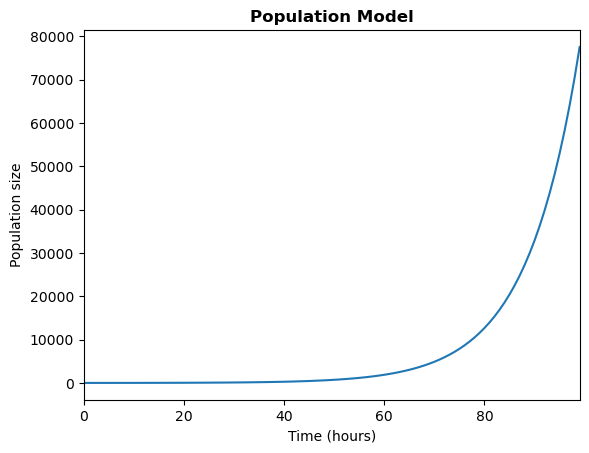

In [35]:
# Plot population (N) as a function of time
hour = np.arange(0,modelSteps)
plt.plot(hour,N)

# add a title (optional: add bold)
plt.title('Population Model', weight='bold')

# add X & Y axis labels
plt.xlabel('Time (hours)')
plt.ylabel('Population size')

# Set a x axis limit
plt.xlim([0,modelSteps-1])

# Show the plt
plt.show()

But what if we wanted to experiment with changing the initial population and growth rate? This is where functions are useful!

### 3. Writing functions

A function takes generic input variables, performs a series of operations on them (including calculations, data processing, plotting, etc.), and returns a specified variable, figure, or even dataset! These can be written within a script, or as a separate python file. Functions are helpful because you don't have to rewrite the same block of code over & over again and because you can ensure that the same actions are being performed on each dataset. It's good practice to use functions when writing code -- particularly outside of jupyter notebooks.

Let's practice building a function by combining our above code into a single function. This function will take the initial population and growth rate as parameters (modelSteps could also be a parameter but we'll leave it as a constant for now!). The function will plot the model output and return an array with the population at each timestep

In [53]:
def growthModel(N0,r):
    """
    Remember to comment your functions! These triple quotes let us write a multi line doc string. It's good practice to include the purpose, inputs, and outputs of a function unless they are very obvious (such as in a very short function)

    Calculate population using growth model dN/dt = r*N and plot population as function of time
    Function take initial population (N0) and hourly growth rate (r) as parameters and returns array with population (# of individuals) at each hour timestep
    """ 
    # Create an empty array to store population size and set population at time = 0
    N = np.zeros(modelSteps)
    N[0] = N0

    # Use for loop to calculate population at each time step
    for i in range (1,modelSteps):
        N[i] = N[i-1] + r * N[i-1]
    
    # Plot population (N) as a function of time
    fig=plt.figure() #makes new figure instead of writing over existing
    hour = np.arange(0,modelSteps)
    plt.plot(hour,N)

    # add a title and axis labels/limits
    plt.title(f'Initial population = {N0}, Growth rate = {r:.2f}/h')
    plt.xlabel('Time (hours)')
    plt.ylabel('Population size')
    plt.xlim([0,modelSteps-1])

    # Show the plt
    plt.show()

    # Return model output
    return N

Now we can test our function! Choose an initial value and growth rate:

In [ ]:
growthModel(5,0.1); #the ; suppresses the function output, if we deleted this we would see the dataframe

population = growthModel(5,0.1) #can also save output using new variable --> don't need ; to suppress output in this case
print(population)

Congratulations! We just constructed and plotted a linear growth model. In this example, we practiced using '*for*' loops, implemented a function, and gained familiarity with several python libraries (`numpy` and `matplotlib`) 

### 4. Optional: Run model with variable growth rate

Now let's add one more layer of complexity so that we can practice with some new tools! In this section, we will use the `scipy` library and learn how to plot a linear regression. We will also practice reading documentation, which is an important skill.

For this exercise, we are going to make our data more messy by letting the growth rate be randomly drawn from a normal distribution. We will then use this variable growth rate in the same population model as above.

Let's practice reading documentation! Our random value will be generated using [this function](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.normal.html#numpy.random.Generator.normal). Use the function to draw a random value from a normal distribution:

In [67]:
# Set values for mean and standard deviation of the normal distribution
mu, sigma = 0.1, 0.01

# Numpy random generator
rng = np.random.default_rng()

# Draw random value from distribution (run it a few time to see output change):
rng.normal(mu,sigma)

0.09939875130492619

Now we can write a function based on the one we wrote in step 3:

In [75]:
def variableGrowthModel(N0,r_mu,r_sigma):
    """
    Calculate and plot population using growth model dN/dt = r*N, where the growth rate (r) is randomly drawn from a normal distribution
    Parameters: initial population (N0), mean hourly growth rate (r_mu), standard deviation of the growth rate distribution (r_sigma) 
    Returns: Model output (array with population at each hour timestep)
    """ 
    # Create an empty array to store population size and set population at time = 0
    N = np.zeros(modelSteps)
    N[0] = N0

    # Use for loop to calculate population at each time step
    for i in range (1,modelSteps):
        r = rng.normal(r_mu,r_sigma)
        N[i] = N[i-1] + r * N[i-1]

    # Plot population (N) as a function of time
    fig=plt.figure()
    hour = np.arange(0,modelSteps)
    plt.plot(hour,N)

    # add axis labels/limits
    plt.xlabel('Time (hours)')
    plt.ylabel('Population size')
    plt.xlim([0,modelSteps-1])

    # Show the plt
    plt.show()

    # Return model output
    return N

Run the function and look at the output:

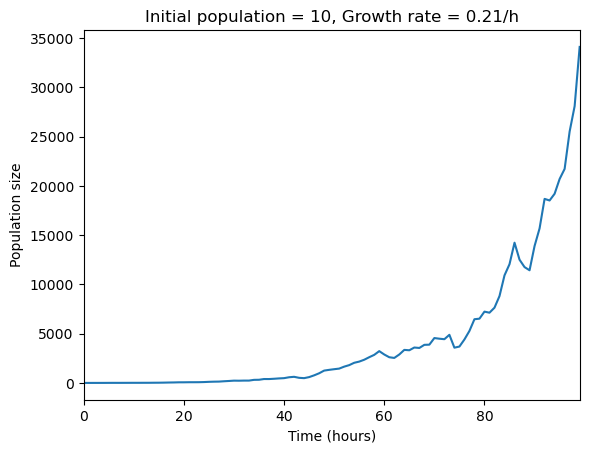

In [97]:
# Call function and assign variable for output
# Run several times to see impact of random number generator on model output
population = variableGrowthModel(10,0.1,0.1)

Exponential growth appears linear when plot natural log. Let's do that here and then add a linear regression to the plot:

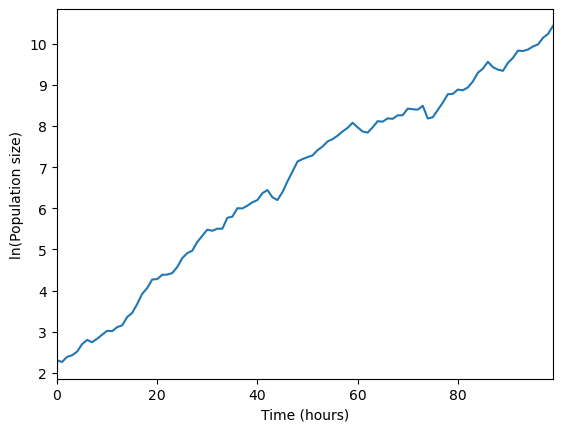

In [98]:
# Plot natural log of population as a function of time
plt.plot(np.arange(0,modelSteps),np.log(population))

# Add axis labels/limits
plt.xlabel('Time (hours)')
plt.ylabel('ln(Population size)')
plt.xlim([0,modelSteps-1])

# Show the plt
plt.show()

Now we can add a linear regression and $R^2$ value to this plot. We will use the scipy.stats.linregress function (see documentation [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html)):

In [108]:
# First we need to import a new library
import scipy as sp

# Calculate linear regression
result = sp.stats.linregress(np.arange(0,modelSteps),np.log(population))

# Print results (R^2, intercept, slope)
print(f"R^2: {result.rvalue**2:.2f}")
print(f"Y-intercept: {result.intercept:.2f}")
print(f"Slope: {result.slope:.4f}")

R^2: 0.98
Y-intercept: 2.66
Slope: 0.0806


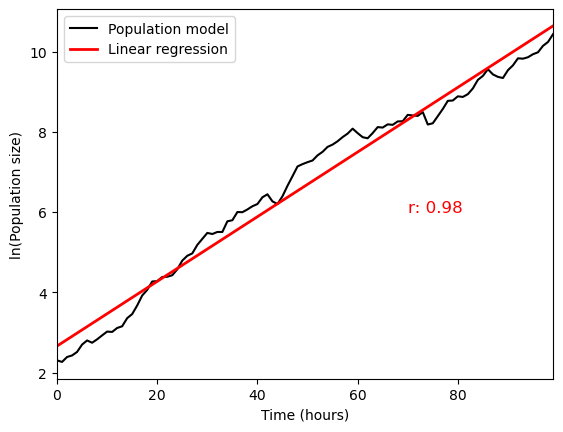

In [106]:
# Add linear regression to plot
# Plot natural log of population as a function of time
hours = np.arange(0,modelSteps)
plt.plot(hours,np.log(population),color='k')

# Add regression line
plt.plot(hours, result.intercept + result.slope*hours, color='r', linewidth=2.0)

# Add legend for model and regression line
plt.legend(['Population model','Linear regression'])

# Print R^2 values
plt.text(70,6,f"r: {result.rvalue**2:.2f}",color='r',fontsize=12)

# Add axis labels/limits
plt.xlabel('Time (hours)')
plt.ylabel('ln(Population size)')
plt.xlim([0,modelSteps-1])

# Show the plt
plt.show()

Good work! We have just learned to perform a linear regression using `scipy`. Now try out exercise 2 to practice importing data from files and creating more plots.